## **Importing the necessary libraries and overview of the dataset**

In [4]:
# Used to ignore the warning given as output of the code
import warnings                                 
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np                              
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt     

# Slightly advanced library for data visualization            
import seaborn as sns                           

# A dictionary output that does not raise a key error
from collections import defaultdict             

# A performance metrics in surprise
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For model tuning model hyper-parameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing cross validation
from surprise.model_selection import KFold

### **Loading the data**

In [5]:
rating = pd.read_csv('ratings.csv')

Data Info

In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
# Dropping timestamp column
rating = rating.drop(['timestamp'], axis=1)

In [8]:
rating.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


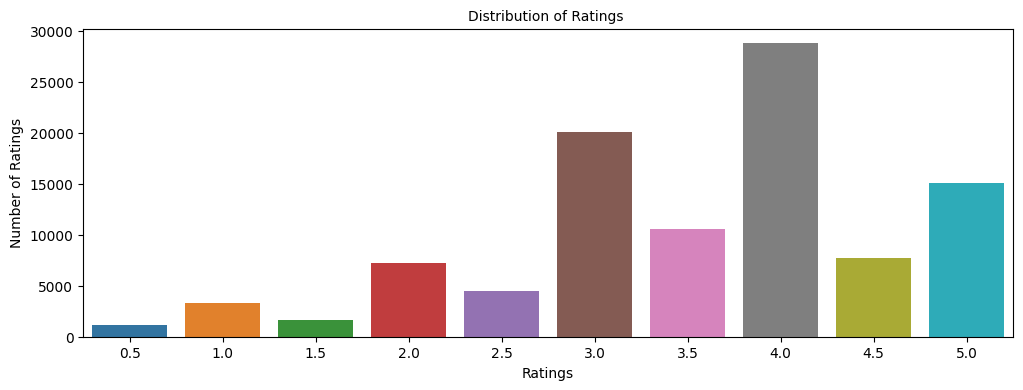

In [9]:
plt.figure(figsize = (12, 4))

sns.countplot(x = "rating", data = rating)

plt.tick_params(labelsize = 10)
plt.title("Distribution of Ratings ", fontsize = 10)
plt.xlabel("Ratings", fontsize = 10)
plt.ylabel("Number of Ratings", fontsize = 10)
plt.show()

Low distribution of ratings are 2 and under

Most ratings are 4 stars folowed by 3 stars then 5 stars

In [10]:
rating['userId'].nunique()

671

There are 671 unique users

In [11]:
rating['movieId'].nunique()

9066

There are 9066 unique movies

In [12]:
rating.groupby(['userId', 'movieId']).count()

rating
userId movieId        
1      31            1
       1029          1
       1061          1
       1129          1
       1172          1
...                ...
671    6268          1
       6269          1
       6365          1
       6385          1
       6565          1

[100004 rows x 1 columns]

In [13]:
rating.groupby(['userId', 'movieId']).count()['rating'].sum()

100004

No userhas interacted with the same movie multiple times. 

In [14]:
rating['movieId'].value_counts()

356       341
296       324
318       311
593       304
260       291
         ... 
98604       1
103659      1
104419      1
115927      1
6425        1
Name: movieId, Length: 9066, dtype: int64

The most interacted movie is movieId:356 with 341 total ratings

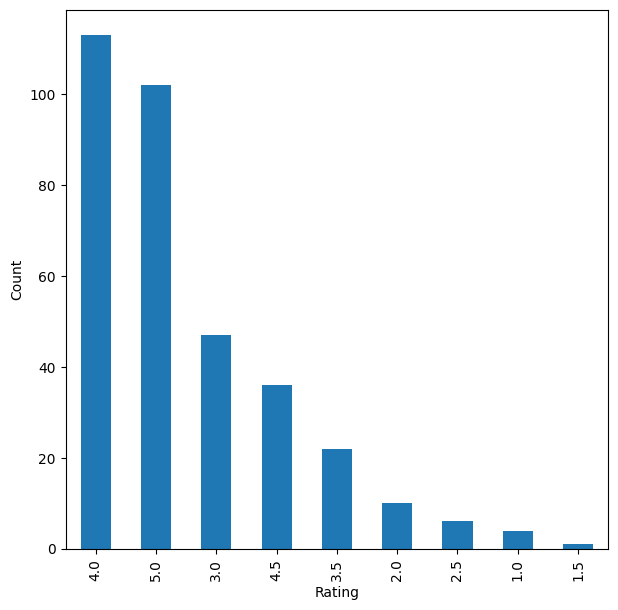

In [15]:
# Plotting distributions of ratings for 341 interactions with movieid 356 
plt.figure(figsize=(7,7))

rating[rating['movieId'] == 356]['rating'].value_counts().plot(kind='bar')

plt.xlabel('Rating')

plt.ylabel('Count')

plt.show()

Movie 356 had 341 total rating, the most falling into either 4 or 5 stars with 4 stars having slightly more reviews. It is followed by 3 stars then 4 and a half stars respectively.

Most ratings are generally pretty high implying that the movie is good.

In [16]:
rating['userId'].value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: userId, Length: 671, dtype: int64

userId 547 has interacted with the most movies. They have interacted with a total of 2391 movies. 

In [17]:
count_interactions = rating.groupby('userId').count()['movieId']
count_interactions

userId
1       20
2       76
3       51
4      204
5      100
      ... 
667     68
668     20
669     37
670     31
671    115
Name: movieId, Length: 671, dtype: int64

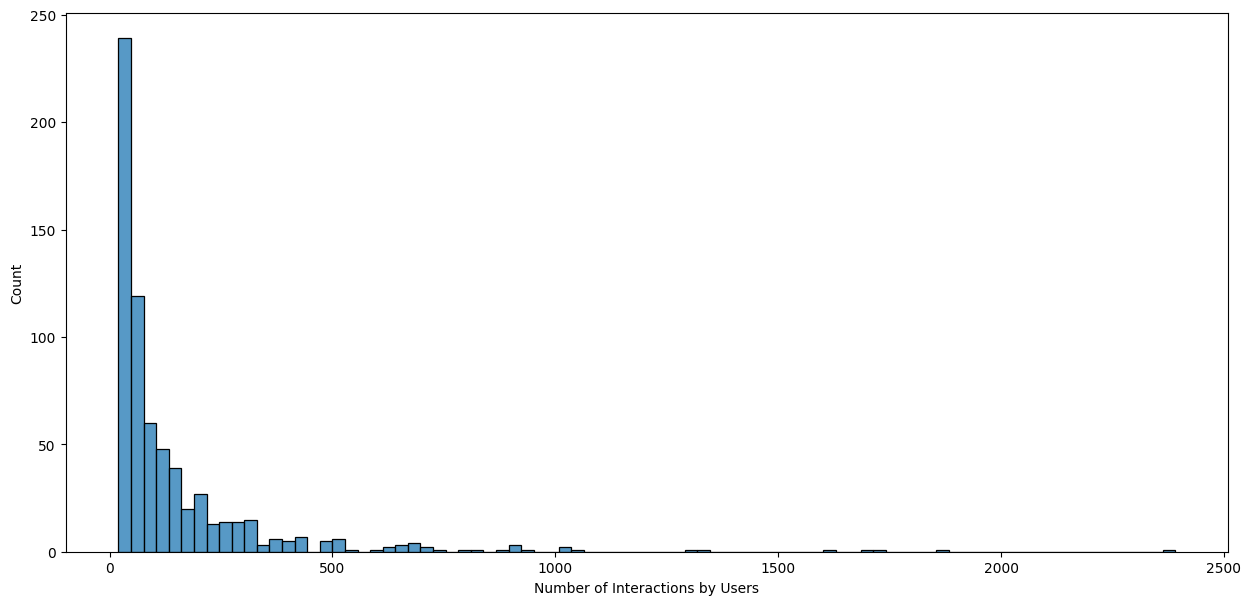

In [18]:
# Plotting user-movie interactions distribution

plt.figure(figsize=(15,7))

sns.histplot(count_interactions)

plt.xlabel('Number of Interactions by Users')

plt.show()


## Ranking Based System

In [19]:
# Calculating average ratings
average_rating = rating.groupby('movieId').mean()['rating']

# Calculating the count of ratings
count_rating = rating.groupby('movieId').count()['rating']

# Making a dataframe with the count and average of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

In [20]:
final_rating.head()

,avg_rating,rating_count
movieId,,
1,3.872470,247
2,3.401869,107
3,3.161017,59
4,2.384615,13
5,3.267857,56


In [21]:
def top_n_movies(data, n, min_interaction=100):
    
    #Finding movies with minimum number of interactions
    recommendations = data[data['rating_count'] >= min_interaction]
    
    #Sorting values w.r.t average rating 
    recommendations = recommendations.sort_values(by='avg_rating', ascending=False)
    
    return recommendations.index[:n]

#### Top 5 with Minimum 50 Interactions

In [22]:
list(top_n_movies(final_rating,5,50))

[858, 318, 969, 913, 1221]

#### Top 5 with Minimum 100 Interactions

In [23]:
list(top_n_movies(final_rating,5,100))

[858, 318, 1221, 50, 527]

#### Top 5 with Minimum 200 Interactions

In [24]:
list(top_n_movies(final_rating,5,200))

[858, 318, 50, 527, 608]

## Collaborative Filtering System

#### Split Train/Test Data

In [25]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [26]:
# Remove _______ and complete the code

# Defining Nearest neighbour algorithm
algo_knn_user = KNNBasic(sim_options = {'name': 'cosine', 'user_based': True}, verbose = False, random_state = 314)

# Train the algorithm on the trainset or fitting the model on train dataset 
algo_knn_user.fit(trainset)

# Predict ratings for the testset
predictions = algo_knn_user.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9925


0.9924509041520163

The RMSE for baseline user based collaborative filtering is approximately 0.9925

# Test Predictions

In [27]:
algo_knn_user.predict(4, 10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 3.62   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=3.6244912065910952, details={'actual_k': 40, 'was_impossible': False})

In [28]:
algo_knn_user.predict(4, 3, verbose=True)

user: 4          item: 3          r_ui = None   est = 3.20   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=3.202703552548654, details={'actual_k': 40, 'was_impossible': False})

### Tune Hyperparameters

In [29]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [17, 21, 25], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine','pearson','pearson_baseline'],
                              'user_based': [True]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
grid_obj = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
grid_obj.fit(data)

# Best RMSE score
print(grid_obj.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(grid_obj.best_params['rmse'])

0.9628861389856818
{'k': 17, 'min_k': 3, 'sim_options': {'name': 'msd', 'user_based': True}}


In [30]:
results_df = pd.DataFrame.from_dict(grid_obj.cv_results)
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_k,param_min_k,param_sim_options
0,0.959317,0.962630,0.966712,0.962886,0.003025,1,0.737421,0.740872,0.741803,0.740032,0.001885,1,0.073998,0.006976,1.400999,0.060139,"{'k': 17, 'min_k': 3, 'sim_options': {'name': ...",17,3,"{'name': 'msd', 'user_based': True}"
1,0.991217,0.994075,0.998813,0.994702,0.003132,17,0.766598,0.768497,0.769670,0.768255,0.001266,12,0.268998,0.038377,1.520331,0.267350,"{'k': 17, 'min_k': 3, 'sim_options': {'name': ...",17,3,"{'name': 'cosine', 'user_based': True}"
2,0.996936,0.997447,0.998929,0.997771,0.000845,26,0.775146,0.775121,0.775845,0.775370,0.000336,28,0.394666,0.056812,1.471331,0.080093,"{'k': 17, 'min_k': 3, 'sim_options': {'name': ...",17,3,"{'name': 'pearson', 'user_based': True}"
3,0.992849,0.991575,0.997158,0.993861,0.002389,15,0.771331,0.770132,0.774166,0.771877,0.001691,18,0.423331,0.046992,1.746333,0.123290,"{'k': 17, 'min_k': 3, 'sim_options': {'name': ...",17,3,"{'name': 'pearson_baseline', 'user_based': True}"
4,0.965432,0.965618,0.969867,0.966972,0.002048,4,0.742008,0.743896,0.744863,0.743589,0.001185,4,0.152334,0.065774,1.494333,0.082562,"{'k': 17, 'min_k': 6, 'sim_options': {'name': ...",17,6,"{'name': 'msd', 'user_based': True}"


In [31]:
# Creating an instance of KNNBasic with optimal hyperparameter values
similarity_algo_optimized_user = KNNBasic(sim_options= {'name': 'msd', 'user_based': True},k=17,min_k=3,verbose=False,random_state=314)

# Training the algorithm on the trainset
similarity_algo_optimized_user.fit(trainset)

# Predicting ratings for the testset
predictions = similarity_algo_optimized_user.test(testset)

# Computing RMSE on testset
accuracy.rmse(predictions)

RMSE: 0.9569


0.956887274188064

The optimized model has an RMSE of approximately 0.9569 which is over 0.03 lower than the baseline model.

#### Test Model Predictions

In [32]:
similarity_algo_optimized_user.predict(4,10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 3.73   {'actual_k': 17, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=3.7265204862397003, details={'actual_k': 17, 'was_impossible': False})

In [33]:
similarity_algo_optimized_user.predict(4,3,verbose=True)

user: 4          item: 3          r_ui = None   est = 3.73   {'actual_k': 17, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=3.7295627009631325, details={'actual_k': 17, 'was_impossible': False})

### Similar Users

In [34]:
similarity_algo_optimized_user.get_neighbors(4, k=5)

[665, 417, 647, 654, 260]

### KNN Model

In [35]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended movie ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='userId', columns='movieId', values='rating')
    
    # Extracting those movie ids which the user_id has not interacted yet
    non_interacted_movies = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the movie id which user_id has not interacted yet
    for item_id in non_interacted_movies:
        
        # Predicting the ratings for those non interacted movie ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted rating movies for this user

#### **Predicted top 5 movies for userId=4**

In [36]:
recommendations = get_recommendations(rating,4,5,similarity_algo_optimized_user)

### **Predict the top 5 movies for userId=4**

In [37]:
recommendations

[(309, 5),
 (3038, 5),
 (6273, 4.928202652354184),
 (98491, 4.863224466679252),
 (926, 4.849617770966273)]

The model recommends user 4 with movies: [309,3038,6273,98491,926]

## Item Based System

In [38]:
# Definfing similarity measure
sim_options = {"name": "cosine", 'user_based':False}

# Defining Nearest neighbour algorithm
algo_knn_item = KNNBasic(sim_options=sim_options,random_state=314,verbose=False)

# Train the algorithm on the trainset or fitting the model on train dataset 
algo_knn_item.fit(trainset)

# Predict ratings for the testset
predictions = algo_knn_item.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.0032


1.003221450633729

The baseline model has an RMSE of approximately 1.0032

### Test Model Predictions

In [39]:
algo_knn_item.predict(4,10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 4.37   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=4.373794871885004, details={'actual_k': 40, 'was_impossible': False})

In [40]:
algo_knn_item.predict(4,3, verbose=True)

user: 4          item: 3          r_ui = None   est = 4.07   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=4.071601862880049, details={'actual_k': 40, 'was_impossible': False})

### Tune Hyperparameters

In [41]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [66,67,68], 'min_k': [2,3,4],
              'sim_options': {'name': ['msd','cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
grid_obj = GridSearchCV(KNNBasic, param_grid=param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
grid_obj.fit(data)

# Best RMSE score
print(grid_obj.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(grid_obj.best_params['rmse'])

0.9381027722513048
{'k': 68, 'min_k': 2, 'sim_options': {'name': 'msd', 'user_based': False}}


In [42]:
results_df = pd.DataFrame.from_dict(grid_obj.cv_results)
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_k,param_min_k,param_sim_options
0,0.935240,0.936908,0.942209,0.938119,0.002971,3,0.720454,0.723044,0.723313,0.722271,0.001289,4,5.022332,0.035124,8.764666,0.418037,"{'k': 66, 'min_k': 2, 'sim_options': {'name': ...",66,2,"{'name': 'msd', 'user_based': False}"
1,0.982979,0.984086,0.987122,0.984729,0.001751,16,0.764829,0.764963,0.765002,0.764931,0.000074,16,8.898988,0.502107,7.670666,0.343225,"{'k': 66, 'min_k': 2, 'sim_options': {'name': ...",66,2,"{'name': 'cosine', 'user_based': False}"
2,0.935171,0.937077,0.942167,0.938139,0.002953,8,0.720430,0.723183,0.723248,0.722287,0.001313,6,6.672333,0.165990,8.115095,0.470209,"{'k': 66, 'min_k': 3, 'sim_options': {'name': ...",66,3,"{'name': 'msd', 'user_based': False}"
3,0.982912,0.984259,0.987128,0.984766,0.001758,18,0.764801,0.765108,0.764967,0.764959,0.000125,17,8.857668,0.376515,7.749665,0.420732,"{'k': 66, 'min_k': 3, 'sim_options': {'name': ...",66,3,"{'name': 'cosine', 'user_based': False}"
4,0.935284,0.936964,0.942111,0.938120,0.002904,4,0.720549,0.723217,0.723276,0.722347,0.001272,9,2.007665,0.190729,8.577999,0.671234,"{'k': 66, 'min_k': 4, 'sim_options': {'name': ...",66,4,"{'name': 'msd', 'user_based': False}"


In [43]:
# Creating an instance of KNNBasic with optimal hyperparameter values
similarity_algo_optimized_item = KNNBasic(sim_options={"name":"msd","user_based":False}, k=67, min_k=3,verbose=False)

# Training the algorithm on the trainset
similarity_algo_optimized_item.fit(trainset)

# Predicting ratings for the testset
predictions = similarity_algo_optimized_item.test(testset)

# Computing RMSE on testset
accuracy.rmse(predictions)

RMSE: 0.9395


0.9395016580846138

The optimized model uses msd similarity and has k set to 67. It produces a RMSE of 0.9395, significantly lower than the baseline model.

### Test Model Predictions

In [44]:
similarity_algo_optimized_item.predict(4,10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 4.33   {'actual_k': 67, 'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=4.333509370790752, details={'actual_k': 67, 'was_impossible': False})

In [45]:
similarity_algo_optimized_item.predict(4, 3, verbose=True)

user: 4          item: 3          r_ui = None   est = 3.95   {'actual_k': 67, 'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=3.949337436632875, details={'actual_k': 67, 'was_impossible': False})

### KNN

In [46]:
similarity_algo_optimized_item.get_neighbors(3, k=5)

[31, 37, 42, 48, 73]

#### Predicted top 5 movies for userId=4

In [47]:
recommendations = get_recommendations(rating, 4, 5, similarity_algo_optimized_item)

In [48]:
recommendations

[(84, 5), (1040, 5), (2481, 5), (3078, 5), (3116, 5)]

## Matrix Factorization using SVD

In [49]:
# Using SVD matrix factorization
algo_svd = SVD()

# Training the algorithm on the trainset
algo_svd.fit(trainset)

# Predicting ratings for the testset
predictions = algo_svd.test(testset)

# Computing RMSE on the testset
accuracy.rmse(predictions)

RMSE: 0.9064


0.9063536043829109

The baseline model has a RMSE of approximately 0.9021

### Test Model Predictions

In [50]:
algo_svd.predict(4, 10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 4.09   {'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=4.092589966831654, details={'was_impossible': False})

In [51]:
algo_svd.predict(4, 3, verbose=True)

user: 4          item: 3          r_ui = None   est = 3.80   {'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=3.8048882357713056, details={'was_impossible': False})

### Tune Hyperparameters

In [52]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30, 40], 'lr_all': [0.001, 0.005, 0.01, 0.015],
              'reg_all': [0.1, 0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8833590664216825
{'n_epochs': 40, 'lr_all': 0.015, 'reg_all': 0.1}


In [53]:
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_n_epochs,param_lr_all,param_reg_all
0,0.940440,0.945420,0.940127,0.941996,0.002425,61,0.735175,0.738729,0.735232,0.736379,0.001662,61,0.251667,0.013598,0.215333,0.005250,"{'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.1}",10,0.001,0.1
1,0.941486,0.946493,0.942177,0.943385,0.002215,62,0.736970,0.740159,0.737582,0.738237,0.001382,62,0.285666,0.007411,0.258335,0.000472,"{'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.2}",10,0.001,0.2
2,0.945545,0.950185,0.946979,0.947569,0.001940,63,0.741896,0.744767,0.742970,0.743211,0.001184,63,0.326667,0.006342,0.219000,0.028248,"{'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.4}",10,0.001,0.4
3,0.950554,0.955294,0.952803,0.952884,0.001936,64,0.747505,0.750383,0.749275,0.749055,0.001185,64,0.275000,0.024537,0.200999,0.006977,"{'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.6}",10,0.001,0.6
4,0.903847,0.909131,0.902643,0.905207,0.002818,31,0.698779,0.702995,0.698925,0.700233,0.001954,26,0.268663,0.009844,0.222668,0.011022,"{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.1}",10,0.005,0.1


In [54]:
# Building the optimized SVD model using optimal hyperparameter search
svd_algo_optimized = SVD(n_epochs=30, lr_all=0.015, reg_all=0.1)

# Training the algorithm on the trainset
svd_algo_optimized.fit(trainset)

# Predicting ratings for the testset
predictions = svd_algo_optimized.test(testset)

# Computing RMSE
accuracy.rmse(predictions)

RMSE: 0.8797


0.8796559991733818

### Test Model Predictions

In [55]:
svd_algo_optimized.predict(4, 10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 3.77   {'was_impossible': False}


Prediction(uid=4, iid=10, r_ui=4, est=3.7723589252468037, details={'was_impossible': False})

In [56]:
svd_algo_optimized.predict(4, 3, verbose=True)

user: 4          item: 3          r_ui = None   est = 3.53   {'was_impossible': False}


Prediction(uid=4, iid=3, r_ui=None, est=3.5276313487812048, details={'was_impossible': False})

### Predict the top 5 movies for userId=4

In [57]:
get_recommendations(rating, 4, 5, svd_algo_optimized)

[(116, 5), (390, 5), (608, 5), (926, 5), (953, 5)]

### **Predicting ratings for already interacted movies** 

In [58]:
def predict_already_interacted_ratings(data, user_id, algo):
    
    # Creating an empty list to store the recommended movie ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='userId', columns='movieId', values='rating')
    
    # Extracting those movie ids which the user_id has interacted already
    interacted_movies = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].notnull()].index.tolist()
    
    # Looping through each of the movie id which user_id has interacted already
    for item_id in interacted_movies:
        
        # Extracting actual ratings
        actual_rating = user_item_interactions_matrix.loc[user_id, item_id]
        
        # Predicting the ratings for those non interacted movie ids by this user
        predicted_rating = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, actual_rating, predicted_rating))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return pd.DataFrame(recommendations, columns=['movieId', 'actual_rating', 'predicted_rating']) # returing top n highest predicted rating movies for this user

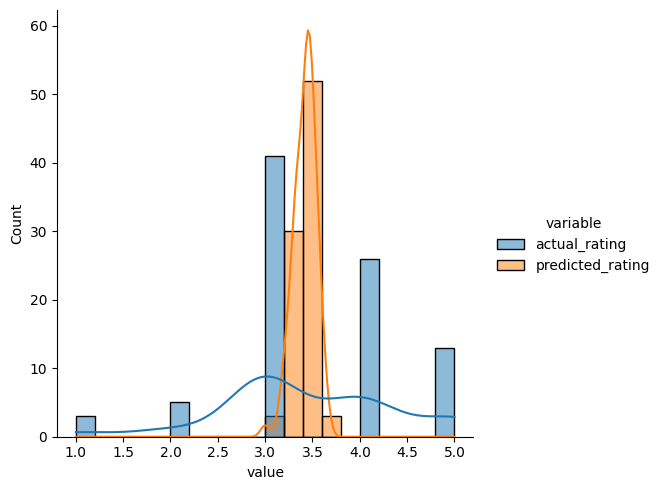

In [59]:
predicted_ratings_for_interacted_movies = predict_already_interacted_ratings(rating, 7, similarity_algo_optimized_item)
df = predicted_ratings_for_interacted_movies.melt(id_vars='movieId', value_vars=['actual_rating', 'predicted_rating'])
sns.displot(data=df, x='value', hue='variable', kde=True);

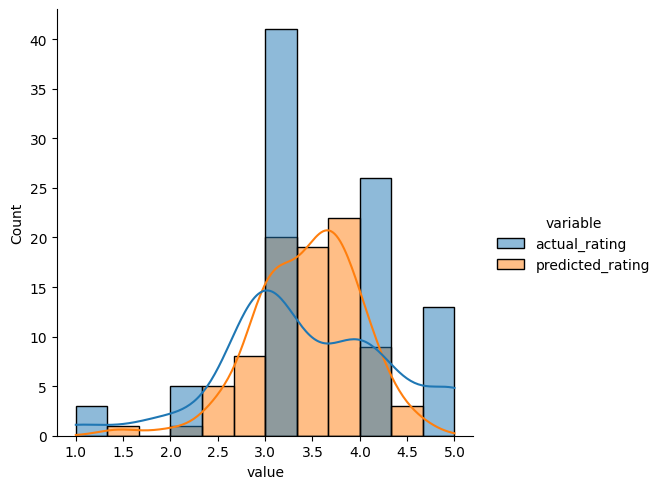

In [60]:
predicted_ratings_for_interacted_movies = predict_already_interacted_ratings(rating, 7, svd_algo_optimized)
df = predicted_ratings_for_interacted_movies.melt(id_vars='movieId', value_vars=['actual_rating', 'predicted_rating'])
sns.displot(data=df, x='value', hue='variable', kde=True);

In [61]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

### Evaluate Models

In [62]:
# Function can be found on surprise documentation FAQs
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

       
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

      
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls



In [63]:
# A basic cross-validation iterator.
kf = KFold(n_splits=5)

# Make list of k values
K = [5, 10]

# Make list of models
models = [algo_knn_item,similarity_algo_optimized_item,algo_knn_user,similarity_algo_optimized_user,algo_svd,svd_algo_optimized]

for k in K:
    for model in models:
        print('> k={}, model={}'.format(k,model.__class__.__name__))
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('-----> Precision: ', round(sum(p) / len(p), 3))
        print('-----> Recall: ', round(sum(r) / len(r), 3))

> k=5, model=KNNBasic
-----> Precision:  0.608
-----> Recall:  0.325
> k=5, model=KNNBasic
-----> Precision:  0.669
-----> Recall:  0.344
> k=5, model=KNNBasic
-----> Precision:  0.767
-----> Recall:  0.412
> k=5, model=KNNBasic
-----> Precision:  0.773
-----> Recall:  0.419
> k=5, model=SVD
-----> Precision:  0.757
-----> Recall:  0.384
> k=5, model=SVD
-----> Precision:  0.766
-----> Recall:  0.393
> k=10, model=KNNBasic
-----> Precision:  0.599
-----> Recall:  0.48
> k=10, model=KNNBasic
-----> Precision:  0.654
-----> Recall:  0.498
> k=10, model=KNNBasic
-----> Precision:  0.753
-----> Recall:  0.552
> k=10, model=KNNBasic
-----> Precision:  0.752
-----> Recall:  0.56
> k=10, model=SVD
-----> Precision:  0.733
-----> Recall:  0.52
> k=10, model=SVD
-----> Precision:  0.75
-----> Recall:  0.536
